In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar
from sklearn import linear_model
from sklearn.metrics import r2_score

In [13]:
data = pd.read_csv("~/Downloads/train.csv")
# test = pd.read_csv("~/Downloads/test2.csv")

In [14]:
def func(data):
    data['datetime']=pd.to_datetime(data['datetime'])
    data['year']=data['datetime'].dt.year
    data['month']=data['datetime'].dt.month
    data['day']=data['datetime'].dt.day
    data['hour']=data['datetime'].dt.hour
    data['minute']=data['datetime'].dt.minute
    data['second']=data['datetime'].dt.second
    return data

In [16]:
data = func(data)
print(data)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.000

<AxesSubplot:xlabel='second', ylabel='count'>

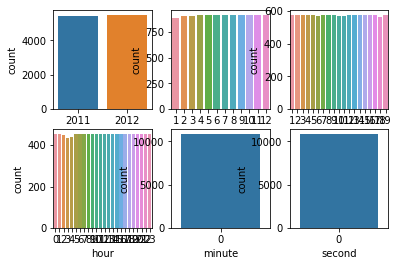

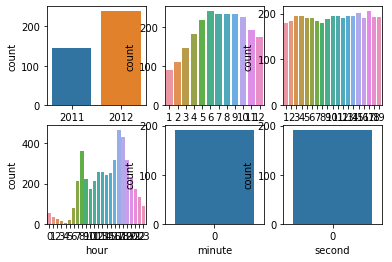

In [51]:
fig, ax = plt.subplots(2,3)
sns.countplot(train['year'],ax=ax[0][0])
sns.countplot(train['month'],ax=ax[0][1])
sns.countplot(train['day'],ax=ax[0][2])
sns.countplot(train['hour'],ax=ax[1][0])
sns.countplot(train['minute'],ax=ax[1][1])
sns.countplot(train['second'],ax=ax[1][2])

fig,ax = plt.subplots(2,3)
sns.barplot(x="year",y="count",data=train.groupby('year')['count'].mean().reset_index(),ax=ax[0][0])
sns.barplot(x="month",y="count",data=train.groupby('month')['count'].mean().reset_index(),ax=ax[0][1])
sns.barplot(x="day",y="count",data=train.groupby('day')['count'].mean().reset_index(),ax=ax[0][2])
sns.barplot(x="hour",y="count",data=train.groupby('hour')['count'].mean().reset_index(),ax=ax[1][0])
sns.barplot(x="minute",y="count",data=train.groupby('minute')['count'].mean().reset_index(),ax=ax[1][1])
sns.barplot(x="second",y="count",data=train.groupby('second')['count'].mean().reset_index(),ax=ax[1][2])

In [53]:
train_y = np.array(train['count'])
del train['count']
train_x = np.array(train)

KeyError: 'count'

In [54]:
regr = linear_model.LinearRegression()

In [21]:
train_x[...,-6:]

array([[2011, 1, 1, 0, 0, 0],
       [2011, 1, 1, 1, 0, 0],
       [2011, 1, 1, 2, 0, 0],
       ...,
       [2012, 12, 19, 21, 0, 0],
       [2012, 12, 19, 22, 0, 0],
       [2012, 12, 19, 23, 0, 0]], dtype=object)

In [30]:
print(np.shape(train_x))
print(np.shape(train_y))
print(np.shape(train_x[...,-6:]))

(10886, 17)
(10886,)
(10886, 6)
()


In [32]:
regr.fit(train_x[...,-6:],train_y)

LinearRegression()

In [ ]:
regr.predict()